In [16]:
import pandas as pd
import squarify
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
unemployment_rate_df = pd.read_csv('unemployement-rate-1948-2010.csv')
unemployment_rate_df.head(7)

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
5,LNS14000000,1948,M06,3.6
6,LNS14000000,1948,M07,3.6


In [4]:
expenditures_df = pd.read_csv('expenditures.txt', sep="\t")
expenditures_df.head(7)

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
5,2008,Healthcare,2976,1
6,2008,Entertainment,2835,1


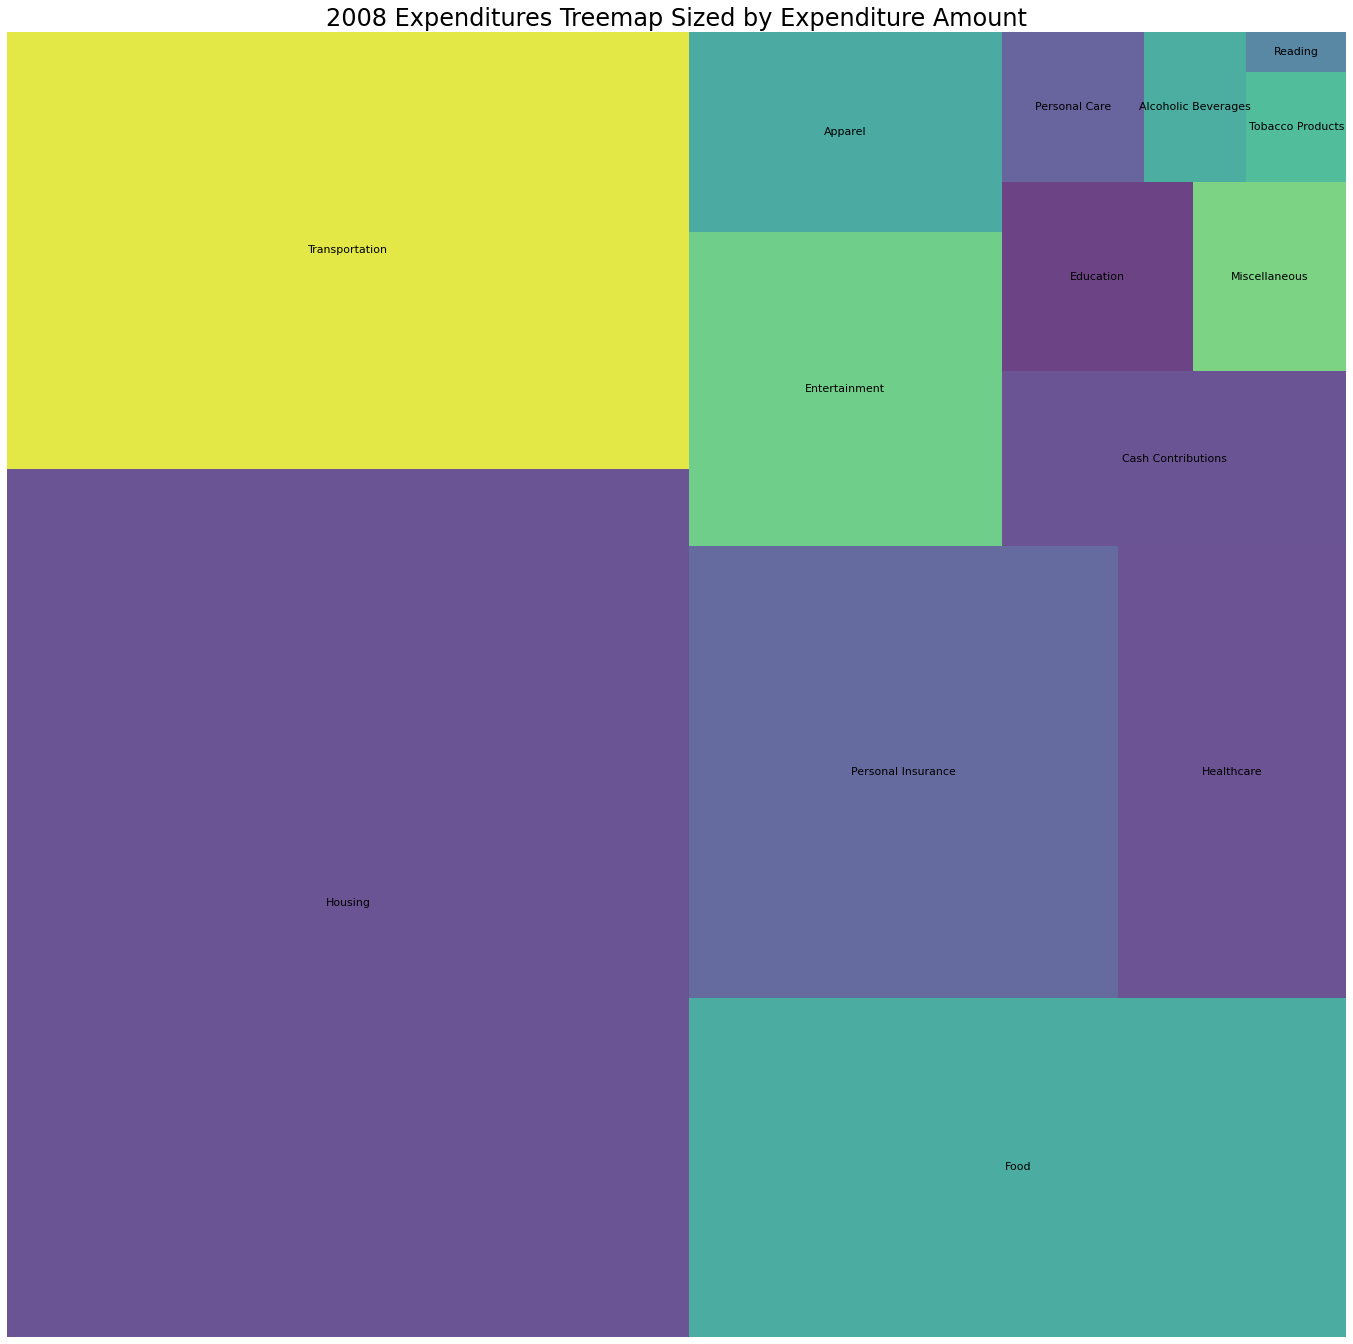

In [69]:
expenditure_2008 = expenditures_df[expenditures_df['year'] == 2008]
expenditure_2008_sorted = expenditure_2008.sort_values('expenditure', ascending=False)
fig, ax = plt.subplots(1, figsize = (24,24))
squarify.plot(sizes=expenditure_2008_sorted['expenditure'],
              label=expenditure_2008_sorted['category'],
              alpha=0.8,
              text_kwargs={'size':'11'},)
plt.title('2008 Expenditures Treemap Sized by Expenditure Amount', size=24)
plt.axis('off')
plt.savefig('C:\\Users\\ramse\\PycharmProjects\\DSC-640-Data-Presentation-and-Visualization\\Weeks 5-6\\fig2.png')
plt.show()

In [44]:
import plotly.express as px
fig = px.treemap(expenditures_df, path=['year', 'category'],
                 values = 'expenditure',
                 color = 'category')
# fig.write_image('C:\\Users\\ramse\\PycharmProjects\\DSC-640-Data-Presentation-and-Visualization\\Weeks 5-6\\bigfig.png')
fig.show()

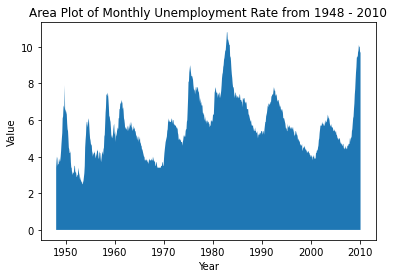

In [89]:
# Area Chart using the unemployment rate dataset
# First, we are going to create a Month/Year column based on the Year, Period columns in the dataset
unemployment_rate_df['Year_Mon'] = unemployment_rate_df['Year'].astype(str) + unemployment_rate_df['Period'].str[1:]
unemployment_rate_df['Year_Mon'] = pd.to_datetime(unemployment_rate_df['Year_Mon'],format='%Y%m')
# Now we create the chart
plt.fill_between(unemployment_rate_df['Year_Mon'], unemployment_rate_df['Value'])
plt.title('Area Plot of Monthly Unemployment Rate from 1948 - 2010')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

C:\Users\ramse\AppData\Local\Temp/ipykernel_18428/2611069614.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\ramse\AppData\Local\Temp/ipykernel_18428/2611069614.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\ramse\AppData\Local\Temp/ipykernel_18428/2611069614.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



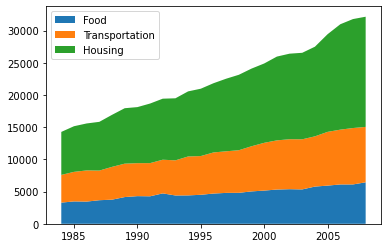

In [128]:
# Stacked Area Chart using the expenditures dataset
# We will use a dataset that contains the big 3, housing, food, and transportation

x = sorted(expenditures_df['year'].unique())

housing = expenditures_df.sort_values('year')[(expenditures_df['category'] == 'Housing')]['expenditure']
housing = housing.reset_index(drop=True)

transportation = expenditures_df.sort_values('year')[(expenditures_df['category'] == 'Transportation')]['expenditure']
transportation = transportation.reset_index(drop=True)

food = expenditures_df.sort_values('year')[(expenditures_df['category'] == 'Food')]['expenditure']
food = food.reset_index(drop=True)

house_food_trans_df = pd.DataFrame({'Year': x, 'Housing': housing, 'Transportation': transportation, 'Food': food})
house_food_trans_df.head()

plt.stackplot(x,house_food_trans_df['Food'], house_food_trans_df['Transportation'], house_food_trans_df['Housing'], labels=['Food', 'Transportation', 'Housing'])
plt.legend(loc='upper left')
plt.show()